## A) Create MySQL DataBase

In [1]:
import mysql.connector as mysql

user, pw, host= 'root', '83219449dD$$', '127.0.0.1'

mydb = mysql.connect(user=user, password=pw, host=host)

mycursor = mydb.cursor()

try:
    print("Execute MySQL to create DataBase")
    mycursor.execute("CREATE DATABASE moh_cpi")
    mydb.commit()
    print("DataBase CREATED!")
except:
    print("Unexpectd Error!")
    exit()
finally:
    mycursor.close()
    mydb.close()

Execute MySQL to create DataBase
DataBase CREATED!


## B) Create Table in MySQL DataBase

In [2]:
import mysql.connector as mysql

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_cpi'

mycursor = mysql.connect(user=user, password = pw, host=host, database = db)
cursor = mycursor.cursor()

create_table = ("CREATE TABLE cpi(year INT(20) NOT NULL, category VARCHAR(50) NOT NULL, cpi FLOAT(20) NOT NULL)")

try:
    print("Execute MySQL to create table")
    cursor.execute(create_table)
    mycursor.commit()
    print("Table Created!")
except:
    print("Unexpected Error!")
    exit()
finally:
    cursor.close()
    mycursor.close()

Execute MySQL to create table
Table Created!


## C) Insert Data into MySQL DataBase

In [3]:
import mysql.connector as mysql
import pandas as pd

filename = 'C:\\Users\Jeffrey Wong\SP_Assignment_2\MOH_consumer-price-indices-cpi.csv'

df = pd.read_csv(filename)

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_cpi'
mycursor = mysql.connect(user=user, password = pw, host=host, database = db)
cursor = mycursor.cursor()

for index, col in df.iterrows():
    data = {'year': col[0],
           'category': col[1],
           'cpi':col[2]}

    sql = ("INSERT INTO cpi(year, category, cpi)"
          "VALUES(%(year)s, %(category)s, %(cpi)s)")

    cursor.execute(sql, data)
    print("Adding row" + str(index))
    mycursor.commit()

print("All data are inserted into DataBase!")

cursor.close()
mycursor.close()

Adding row0
Adding row1
Adding row2
Adding row3
Adding row4
Adding row5
Adding row6
Adding row7
Adding row8
Adding row9
Adding row10
Adding row11
Adding row12
Adding row13
Adding row14
Adding row15
Adding row16
Adding row17
Adding row18
Adding row19
All data are inserted into DataBase!


## D) Retrieve Data from MySQL DataBase

***** Welcome to the MOH Consumer Price Index DataBase *****
1) General Category
2) Health Category
3) Both General & Health Category
--------------------------------------------------------------------
Please select one of the category above <e.g. 1>: 3


Info of Dataset for General & Health category: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
category    20 non-null object
year        20 non-null int64
cpi         20 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 560.0+ bytes
None


Table of Data for General & Health category: 
   category  year     cpi
0   General  2006  78.008
1    Health  2006  77.148
2   General  2007  79.650
3    Health  2007  80.270
4   General  2008  84.929
5    Health  2008  84.641
6   General  2009  85.436
7    Health  2009  86.176
8   General  2010  87.848
9    Health  2010  87.733
10  General  2011  92.458
11   Health  2011  89.814
12  General  2012  96.689
13   Health  201

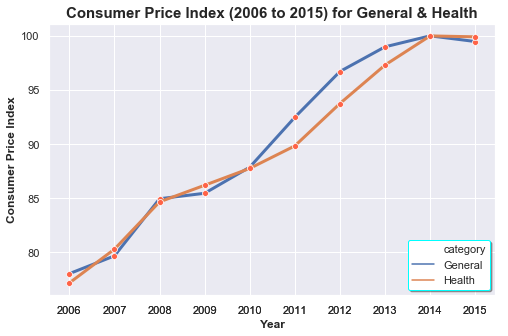

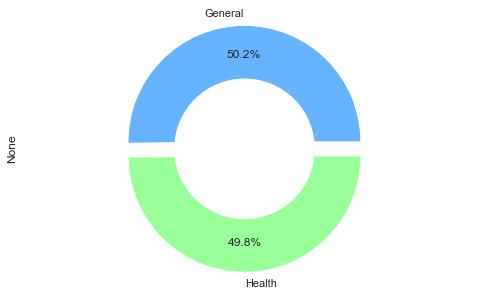

In [7]:
import mysql.connector as mysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

############################################## Define Functions ##########################################################

def data_info(category, cpi_df1):
    print()
    print("Info of Dataset for {} category: ". format(category))
    print("========================================================")
    print(cpi_df1.info())
    print()


def table_of_data(category, cpi_df1):
    print()
    print("Table of Data for {} category: ".format(category))
    print("=========================================================")
    print(cpi_df1)
    print()

def descriptive_stat_summary(cpi_df1, category):
    print("Basic Descriptive Statistics Summary for {} category:".format(category))
    print("=========================================================")
    print(cpi_df1['cpi'].describe())
    print()

def line_graph(category, cpi_df1):
    print("Graphical Summary for {} category:".format(category))
    print("=========================================================")
    sns.set(style = "darkgrid", rc = {'figure.figsize' : (8,5)})
    ax = sns.lineplot(x = "year", y = "cpi", hue = 'category', data = cpi_df1, marker = "o",linewidth = 3, 
                      markerfacecolor = "tomato")
    ax.set_title("Consumer Price Index (2006 to 2015) for {}".format(category), fontsize = 15, fontweight = "bold" )
    ax.set_xlabel("Year", fontsize = 12, fontweight = "bold")
    ax.set_ylabel("Consumer Price Index", fontsize = 12, fontweight = "bold")
    ax.set_xticks(cpi_df1['year'])
    ax.legend(loc = "lower right", facecolor = "white", edgecolor = "cyan", shadow = True)

    plt.show(ax)

def pie_chart(category, new_cpi_df):
    explode = (0.06, 0.06)
    colors = ['#66b3ff','#99ff99']
    labels = ['General', 'Health']
    ax = new_cpi_df.plot(kind = 'pie', y = ['cpi_x', 'cpi_y'], autopct='%1.1f%%', pctdistance = 0.75, explode = explode,
                        labels = labels, colors = colors)
    centre_circle = plt.Circle((0,0),0.60,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')
    
    plt.show()
############################################### Data Analysis ############################################################
user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_cpi'

mycursor = mysql.connect(user=user, password=pw, host=host, database=db)
cursor = mycursor.cursor()

print("***** Welcome to the MOH Consumer Price Index DataBase *****")
print("====================================================================")
print("1) General Category")
print("2) Health Category")
print("3) Both General & Health Category")
print("--------------------------------------------------------------------")
choice = int(input("Please select one of the category above <e.g. 1>: "))
print()

if choice == 1:
    category = "General"
    sql = "SELECT * FROM cpi WHERE category = '" + category + "' "
    
    cpi_df = pd.read_sql(sql, con = mycursor)
    cpi_df1 = pd.DataFrame(cpi_df)
    
    ### call the function to include the info of the data
    data_info(category, cpi_df1)
    
    ### call the function to display table of data
    table_of_data(category, cpi_df1)
    
    ### call the function to display basic descriptive statistics summary
    descriptive_stat_summary(cpi_df1, category)
    
    ### call the function to display line graph
    line_graph(category, cpi_df1)
    
elif choice == 2:
    category = "Health"
    sql = "SELECT * FROM cpi WHERE category = '" + category + "' "
    
    cpi_df = pd.read_sql(sql, con = mycursor)
    cpi_df1 = pd.DataFrame(cpi_df)
    
    ### call the function to include the info of the data
    data_info(category, cpi_df1)
    
    ### call the function to display table of data
    table_of_data(category, cpi_df1)
    
    ### call the function to display basic descriptive statistics summary
    descriptive_stat_summary(cpi_df1, category)
    
    ### call the function to display line graph
    line_graph(category, cpi_df1)
    
elif choice == 3:
    category = "category"
    year = "year"
    cpi = "cpi"
    sql = "SELECT {},{},{} FROM cpi".format(category, year, cpi)
    category = "General & Health"
    
    cpi_df = pd.read_sql(sql, con = mycursor)
    cpi_df1 = pd.DataFrame(cpi_df)
    
    ### call the function to include the info of the data
    data_info(category, cpi_df1)
    
    ### call the function to display table of data
    table_of_data(category, cpi_df1)
    
    ### call the function to display basic descriptive statistics summary
    descriptive_stat_summary(cpi_df1, category)
    
    ### calling function to display line graph
    line_graph(category, cpi_df1)
    
    ### compute the average for both health and general cpi respectively
    general_cpi_df2 = cpi_df1.loc[cpi_df1['category'] == 'General']
    health_cpi_df2 = cpi_df1.loc[cpi_df1['category'] == 'Health']
    merge_data = pd.merge(general_cpi_df2, health_cpi_df2, how = 'right', on = 'year')
    merge_data = merge_data.drop(columns = ['year','category_x', 'category_y'])
    new_cpi_df = merge_data.mean()
    
    ### call the function to display pie chart
    pie_chart(category, new_cpi_df)
    
cursor.close()
mycursor.close()

## E) Delete Table in MySQL DataBase

In [8]:
import mysql.connector, sys

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_cpi'

mycursor = mysql.connector.connect(user=user, password = pw, host=host, database = db)
cursor = mycursor.cursor()

mysql = ("DROP TABLE cpi")

try:
    print("Execute MySQL to DELETE TABLE")
    cursor.execute(mysql)
    mycursor.commit()
    print("Table Deleted!")
except:
    print("Unexpected Error!")
    exit()
finally:
    cursor.close()
    mycursor.close()

Execute MySQL to DELETE TABLE
Table Deleted!


## F) Delete MySQL DataBase

In [9]:
import mysql.connector, sys

user, pw, host = 'root', '83219449dD$$', '127.0.0.1'

mycursor = mysql.connector.connect(user=user, password = pw, host=host)
cursor = mycursor.cursor()

mysql = ("DROP DATABASE moh_cpi")

try:
    print("Execute MySQL to DELETE DATABASE")
    cursor.execute(mysql)
    mycursor.commit()
    print("DataBase Deleted!")
except:
    print("Unexpected Error!")
    exit()
finally:
    cursor.close()
    mycursor.close()

Execute MySQL to DELETE DATABASE
DataBase Deleted!
